In [7]:
# Import definition
from scipy.io import arff
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
# ------------------ PREPROCESSING AND DATA FILTERING -------------------- #

# Loading dataset into working desk
data = arff.loadarff('../data/breast.w.arff')
df = pd.DataFrame(data[0])

# Removes NaN values from dataset by deleting rows
df.dropna(axis=0, how="any", inplace=True)

# Gets X (data matrix) and y (target values column matrix)
X = df.drop("Class", axis=1).to_numpy()
y = df["Class"].to_numpy()

# Performalignantms some preprocessing by turning labels into binaries (benign is 1)
# We are doing a "double conversion" to convert everything to Binary type
for count, value in enumerate(y):
    if value == b"malignant":
        y[count] = "yes"
    else:
        y[count] = "no"

lb = LabelBinarizer()
y = lb.fit_transform(y)


[[433  11]
 [ 10 229]]
Confunsion Matrix without early stopping
Accuracy 0.9692532942898975
[[390  54]
 [  5 234]]
Confunsion Matrix with early stopping
Accuracy 0.9136163982430454


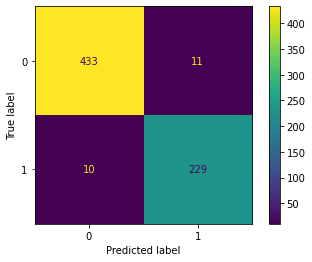

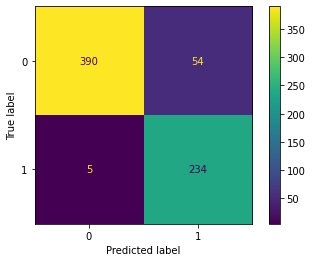

In [9]:
# Holds values for confusion matrix without early stopping
cm_1 = {
    "tp" : 0,
    "fp" : 0,
    "tn" : 0,
    "fn" : 0
}

# Holds values for confusion matrix with early stopping
cm_2 = {
    "tp" : 0,
    "fp" : 0,
    "tn" : 0,
    "fn" : 0
}


# ------------------ QUESTION 2 ------------------------ #

# TODO: falar com o professor sobre o alpha (l2 regularization)

# Creates a 5 fold cross validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# For each train/test set, we use a MLP classifier without early stopping
for train_index, test_index in skf.split(X, y):
    # Uses indexes to fetch which values are going to be used to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scaling data (assuming standard scaling)
    #scaler = StandardScaler().fit(X_train)
    #X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)

    #MLP classifier without early stopping (L2)
    mlp = MLPClassifier(hidden_layer_sizes=(3, 2), early_stopping= False, alpha= 3, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

    #Trains mlp classifier
    mlp.fit(X_train, y_train.ravel())

    #Predicts new y and saves new valuesmalignant
    y_predicted = mlp.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm_1["tn"] += tn
    cm_1["fp"] += fp
    cm_1["fn"] += fn
    cm_1["tp"] += tp

# For each tindicator matrixrain/test set, we use a MLP classifier with early stopping
for train_index, test_index in skf.split(X, y):

    # Uses indexes to fetch which values are going to be used to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scaling data (assuming standard scaling)
    #scaler = StandardScaler().fit(X_train)
    #X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)

    #MLP classifier without early stopping (L2)
    mlp = MLPClassifier(hidden_layer_sizes=(3, 2), early_stopping=True, alpha= 3, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

    #Trains mlp classifier
    mlp.fit(X_train, y_train.ravel())

    #Predicts new y and saves new values
    y_predicted = mlp.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm_2["tn"] += tn
    cm_2["fp"] += fp
    cm_2["fn"] += fn
    cm_2["tp"] += tp

cm_1_final = np.array([[cm_1["tn"], cm_1["fp"]], [cm_1["fn"], cm_1["tp"]]])
print(cm_1_final)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_1_final)
print('Confunsion Matrix without early stopping')
print('Accuracy', ((cm_1["tn"] + cm_1["tp"])/(cm_1["tn"] + cm_1["tp"] + cm_1["fp"] + cm_1["fn"])))
disp1.plot()

cm_2_final = np.array([[cm_2["tn"], cm_2["fp"]], [cm_2["fn"], cm_2["tp"]]])
print(cm_2_final)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_2_final)
print('Confunsion Matrix with early stopping')
print('Accuracy', ((cm_2["tn"] + cm_2["tp"])/(cm_2["tn"] + cm_2["tp"] + cm_2["fp"] + cm_2["fn"])))
disp2.plot()

plt.show()



